<a href="https://colab.research.google.com/github/SAZZZO99/Machine-Learning-Basics/blob/master/Linear_Regression_without_feature_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [10]:
uploaded = files.upload()

Saving boston.csv to boston.csv


In [11]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "boston.csv" with length 37658 bytes


In [12]:

uploaded

{'boston.csv': b'"","crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat","medv"\n"1",0.00632,18,2.31,0,0.538,6.575,65.2,4.09,1,296,15.3,396.9,4.98,24\n"2",0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6\n"3",0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7\n"4",0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4\n"5",0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.9,5.33,36.2\n"6",0.02985,0,2.18,0,0.458,6.43,58.7,6.0622,3,222,18.7,394.12,5.21,28.7\n"7",0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.6,12.43,22.9\n"8",0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.9,19.15,27.1\n"9",0.21124,12.5,7.87,0,0.524,5.631,100,6.0821,5,311,15.2,386.63,29.93,16.5\n"10",0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.1,18.9\n"11",0.22489,12.5,7.87,0,0.524,6.377,94.3,6.3467,5,311,15.2,392.52,20.45,15\n"12",0.11747,12.5,7.87,0,0.524,6.009,82.9,6.2267,5,311,15.2,3

In [0]:
import io

In [14]:
df= pd.read_csv(io.StringIO(uploaded['boston.csv'].decode('utf-8')))
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
df.info

<bound method DataFrame.info of      Unnamed: 0     crim    zn  indus  chas  ...  tax  ptratio   black  lstat  medv
0             1  0.00632  18.0   2.31     0  ...  296     15.3  396.90   4.98  24.0
1             2  0.02731   0.0   7.07     0  ...  242     17.8  396.90   9.14  21.6
2             3  0.02729   0.0   7.07     0  ...  242     17.8  392.83   4.03  34.7
3             4  0.03237   0.0   2.18     0  ...  222     18.7  394.63   2.94  33.4
4             5  0.06905   0.0   2.18     0  ...  222     18.7  396.90   5.33  36.2
..          ...      ...   ...    ...   ...  ...  ...      ...     ...    ...   ...
501         502  0.06263   0.0  11.93     0  ...  273     21.0  391.99   9.67  22.4
502         503  0.04527   0.0  11.93     0  ...  273     21.0  396.90   9.08  20.6
503         504  0.06076   0.0  11.93     0  ...  273     21.0  396.90   5.64  23.9
504         505  0.10959   0.0  11.93     0  ...  273     21.0  393.45   6.48  22.0
505         506  0.04741   0.0  11.93     0 

In [16]:
df.columns

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [17]:
df.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,253.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,1.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,127.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,253.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,379.750000,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,506.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [0]:
X = df[[ 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat']]

In [0]:
Y=df['medv']

In [0]:
from sklearn.model_selection  import train_test_split

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lm= LinearRegression()

In [30]:
lm.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(lm.intercept_)

32.90613090863683


In [33]:
print(lm.coef_)

[-9.89913563e-02  4.25047578e-02  1.67390094e-02  3.06437882e+00
 -1.56462528e+01  4.01888422e+00 -8.31558474e-04 -1.44628034e+00
  2.67827281e-01 -1.04725485e-02 -8.88651815e-01  8.25262805e-03
 -5.49367192e-01]


In [34]:
X_train.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat'],
      dtype='object')

In [0]:
cdf=pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [36]:
cdf

,Coeff
crim,-0.098991
zn,0.042505
indus,0.016739
chas,3.064379
nox,-15.646253
rm,4.018884
age,-0.000832
dis,-1.446280
rad,0.267827
tax,-0.010473


In [0]:
predictions=lm.predict(X_test)

In [38]:
predictions

array([40.38909533, 27.88818526, 16.33126585, 17.34675932, 30.91273758,
       32.82478967, 39.95560959,  8.4519632 , 33.28696607,  7.26751237,
       29.77875241, 13.70647921, 16.10840816, 16.65150567, 25.03371365,
       19.89032014,  6.79501283, 32.9949698 , 28.45233055, 24.72790211,
       12.81760374, 20.2792643 , 22.37316895, 24.95238223, 34.01786165,
       19.10866644, 31.80654265, 19.09506858, 26.40103588, 34.13083397,
       19.66337036, 18.24445944, 36.99113563, 44.48687324, 30.72146569,
       22.31475986, 16.17389267, 17.91169858,  4.80466972, 30.60025057,
       23.92860043, 16.46250167, 35.26168512, 13.85353888, 17.81678796,
       25.33703575, 30.79303765, 16.47025922, 26.65460208, 23.15784888,
       32.62443559, 38.6798773 , 22.21243126, 15.78598365, 30.5359631 ,
       -0.25281891, 20.07283762, 16.83546069, 22.54691328, 20.67388019,
       30.46894504,  3.38104287, 13.94720253, 19.46240302, 10.03614762,
       24.67738776, 24.20357095, 19.43161581, 18.3602221 , 19.03

In [39]:
Y_test

195    50.0
4      36.2
434    11.7
458    14.9
39     30.8
       ... 
227    31.6
405     5.0
69     20.9
231    31.7
104    20.1
Name: medv, Length: 102, dtype: float64

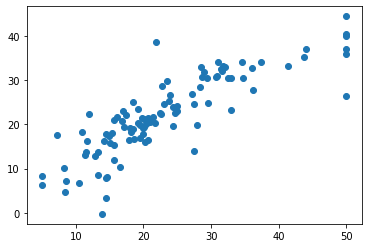

In [41]:
plt.scatter(Y_test,predictions)

In [0]:
from sklearn import metrics

In [43]:
metrics.mean_absolute_error(Y_test,predictions)

3.9994042530538776

In [44]:
metrics.mean_squared_error(Y_test,predictions)

33.268918557919754

In [45]:
np.sqrt(metrics.mean_squared_error(Y_test,predictions))

5.767921511074831

In [0]:
accuracy=lm.score(X_test,Y_test)

In [47]:
print(accuracy*100)

70.34623076515895
